In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [6]:
df['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [7]:
from sklearn.utils import resample

In [8]:
# Separate the case of yes-subscribes and no-subscribes

bank_subscribed_no = df[df['subscribed'] == 'no']
bank_subscribed_yes = df[df['subscribed'] == 'yes']

In [9]:
##Upsample the yes-subscribed cases.
df_minority_upsampled = resample(bank_subscribed_yes, replace=True, n_samples=4300, random_state=42)

In [10]:
# df = pd.concat([bank_subscribed_no, df_minority_upsampled])

In [11]:
# df.shape

In [12]:
# df.reset_index(drop=True,inplace=True)

In [13]:
# df.head()

In [14]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [15]:
print(df['age'].max())
print(df['age'].min())
print(np.quantile(df['age'],q=(0.25,0.5,0.75)))

lcut = np.quantile(df['age'],q=(0.01))
rcut = np.quantile(df['age'],q=(0.99))


95
18
[33. 39. 48.]


In [16]:
for i in df.index:
    if df.loc[i,'age']<lcut:
        df.loc[i,'age']=lcut
    if df.loc[i,'age']>rcut:
        df.loc[i,'age']=rcut

In [17]:
print(df['age'].max())
print(df['age'].min())

71.0
23.0


In [18]:
# We can remove the records that has less than 5%(This will contribute to underfitting)
# and can remove the records greater than 35%(This will contribute to overfitting.)

In [19]:
# combine self-employed,entrepreneur,housemaid
for i in df.index:
    if (df.loc[i,'job']=='self-employed') or (df.loc[i,'job']=='housemaid'):
        df.loc[i,'job']='entrepreneur'

In [20]:
df['job'].unique()

array(['admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'entrepreneur', 'student', 'unemployed'],
      dtype=object)

In [21]:
# combine unknown, unemployed,student

for i in df.index:
    if (df.loc[i,'job']=='unknown') or (df.loc[i,'job']=='student'):
        df.loc[i,'job']='unemployed'

In [22]:
df['job'].unique()

array(['admin.', 'unemployed', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'entrepreneur'], dtype=object)

In [23]:
(df['default'].value_counts()/df.shape[0])*100

no     98.151484
yes     1.848516
Name: default, dtype: float64

In [24]:
df1=df.drop(['default'],axis=1)

In [25]:
df1.head()

,ID,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56.0,admin.,married,unknown,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31.0,unemployed,married,secondary,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27.0,services,married,secondary,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57.0,management,divorced,tertiary,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31.0,technician,married,secondary,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [26]:
print(df1['balance'].max())
print(df1['balance'].min())
print(np.quantile(df1['balance'],q=(0.25,0.5,0.75)))

102127
-8019
[  73.  450. 1431.]


In [27]:
bal_lcut = np.quantile(df1['balance'],q=(0.01))
bal_rcut = np.quantile(df1['balance'],q=(0.99))

for i in df1.index:
    if df1.loc[i,'balance']<bal_lcut:
        df1.loc[i,'balance']=bal_lcut
    if df1.loc[i,'balance']>bal_rcut:
        df1.loc[i,'balance']=bal_rcut

In [28]:
print(df1['balance'].max())
print(df1['balance'].min())
print(np.quantile(df1['balance'],q=(0.25,0.5,0.75)))

13187.620000000003
-626.54
[  73.  450. 1431.]


In [29]:
(df1['housing'].value_counts()/df1.shape[0])*100

yes    55.562929
no     44.437071
Name: housing, dtype: float64

In [30]:
(df1['loan'].value_counts()/df1.shape[0])*100

no     83.786773
yes    16.213227
Name: loan, dtype: float64

In [31]:
df2 = df1.drop(['loan'],axis=1)

In [32]:
df2.head()

,ID,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56.0,admin.,married,unknown,1933.0,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31.0,unemployed,married,secondary,3.0,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27.0,services,married,secondary,891.0,yes,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57.0,management,divorced,tertiary,3287.0,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31.0,technician,married,secondary,119.0,yes,cellular,4,feb,380,1,-1,0,unknown,no


In [33]:
print(df2['duration'].max())
print(df2['duration'].min())
print(np.quantile(df2['duration'],q=(0.25,0.5,0.75)))

4918
0
[104.  180.  318.5]


In [34]:
dur_lcut = np.quantile(df2['duration'],q=(0.01))
dur_rcut = np.quantile(df2['duration'],q=(0.99))

for i in df2.index:
    if df2.loc[i,'duration']<dur_lcut:
        df2.loc[i,'duration']=dur_lcut
    if df2.loc[i,'duration']>dur_rcut:
        df2.loc[i,'duration']=dur_rcut

In [35]:
# campaign

In [36]:
print(df2['campaign'].max())
print(df2['campaign'].min())
print(np.quantile(df2['campaign'],q=(0.25,0.5,0.75)))

63
1
[1. 2. 3.]


In [37]:
cam_lcut = np.quantile(df2['campaign'],q=(0.01))
cam_rcut = np.quantile(df2['campaign'],q=(0.99))

for i in df2.index:
    if df2.loc[i,'campaign']<cam_lcut:
        df2.loc[i,'campaign']=cam_lcut
    if df2.loc[i,'campaign']>cam_rcut:
        df2.loc[i,'campaign']=cam_rcut

In [38]:
print(np.quantile(df2['pdays'],q=(0.25,0.5,0.75)))
print(df2['pdays'].median())

[-1. -1. -1.]
-1.0


In [39]:
# We can drop pdays

In [40]:
print(np.quantile(df2['previous'],q=(0.25,0.5,0.75)))
print(df2['previous'].median())

[0. 0. 0.]
0.0


In [41]:
(df2['poutcome'].value_counts()/df2.shape[0])*100

unknown    81.931937
failure    10.623440
other       4.069896
success     3.374727
Name: poutcome, dtype: float64

In [42]:
# We can drop poutcome as well

In [43]:
df3 = df2.drop(['pdays','previous','poutcome'],axis=1)

In [44]:
df3.head()

,ID,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,subscribed
0,26110,56.0,admin.,married,unknown,1933.0,no,telephone,19,nov,44.0,2.0,no
1,40576,31.0,unemployed,married,secondary,3.0,no,cellular,20,jul,91.0,2.0,no
2,15320,27.0,services,married,secondary,891.0,yes,cellular,18,jul,240.0,1.0,no
3,43962,57.0,management,divorced,tertiary,3287.0,no,cellular,22,jun,867.0,1.0,yes
4,29842,31.0,technician,married,secondary,119.0,yes,cellular,4,feb,380.0,1.0,no


## Transformation

##### After transformation, Select Kbest on numerical columns

- 3 bins - High,Medium,Low
- 4 bins - High, Mediun-High, Medium-low, Low
- 5 bins - High, Medium-High, Medium, Medium-low, Low

In [45]:
def bin_func(col,cut_points,labels=None):
    min_val=col.min()
    max_val=col.max()
    break_points=[min_val]+cut_points+[max_val]
    print(break_points)
    if not labels:
        labels=range(len(cut_points)+1)
    values=pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return values

In [46]:
# age===> Binning

cut_points = [28,40]
labels = ['Young','middle','old']
df3['age_cat']=bin_func(df3['age'],cut_points,labels)

[23.0, 28, 40, 71.0]


In [47]:
df3.head()

,ID,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,subscribed,age_cat
0,26110,56.0,admin.,married,unknown,1933.0,no,telephone,19,nov,44.0,2.0,no,old
1,40576,31.0,unemployed,married,secondary,3.0,no,cellular,20,jul,91.0,2.0,no,middle
2,15320,27.0,services,married,secondary,891.0,yes,cellular,18,jul,240.0,1.0,no,Young
3,43962,57.0,management,divorced,tertiary,3287.0,no,cellular,22,jun,867.0,1.0,yes,old
4,29842,31.0,technician,married,secondary,119.0,yes,cellular,4,feb,380.0,1.0,no,middle


In [48]:
# month FY quarters | Q1 : Jan to Mar, Q2 : Apl to Jun, Q3 : Jul to Sept, Q4 : Oct to Dec || Drop raw data
def mon_cat(val):
    if val in ['jan','feb','mar']:
        return 'Q1'
    elif val in ['apr','may','jun']:
        return 'Q2'
    elif val in ['jul','aug','sep']:
        return 'Q3'
    else:
        return 'Q4'

In [49]:
df3['month_cat']=[mon_cat(i) for i in df3.month]

In [50]:
df3.head()

,ID,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,subscribed,age_cat,month_cat
0,26110,56.0,admin.,married,unknown,1933.0,no,telephone,19,nov,44.0,2.0,no,old,Q4
1,40576,31.0,unemployed,married,secondary,3.0,no,cellular,20,jul,91.0,2.0,no,middle,Q3
2,15320,27.0,services,married,secondary,891.0,yes,cellular,18,jul,240.0,1.0,no,Young,Q3
3,43962,57.0,management,divorced,tertiary,3287.0,no,cellular,22,jun,867.0,1.0,yes,old,Q2
4,29842,31.0,technician,married,secondary,119.0,yes,cellular,4,feb,380.0,1.0,no,middle,Q1


In [51]:
# Day==> Week of the month
def day_cat(val):
    return int((val/7)+1)

In [52]:
df3['day_cat']=[day_cat(i) for i in df3.day]

In [53]:
df3.head()

,ID,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,subscribed,age_cat,month_cat,day_cat
0,26110,56.0,admin.,married,unknown,1933.0,no,telephone,19,nov,44.0,2.0,no,old,Q4,3
1,40576,31.0,unemployed,married,secondary,3.0,no,cellular,20,jul,91.0,2.0,no,middle,Q3,3
2,15320,27.0,services,married,secondary,891.0,yes,cellular,18,jul,240.0,1.0,no,Young,Q3,3
3,43962,57.0,management,divorced,tertiary,3287.0,no,cellular,22,jun,867.0,1.0,yes,old,Q2,4
4,29842,31.0,technician,married,secondary,119.0,yes,cellular,4,feb,380.0,1.0,no,middle,Q1,1


In [54]:
# Balance==> Raw,Binning, ILATE(Inverse(1/x), logarthimic(logx), Algebric(x^2,x^3,sqrt(x),cubert(x)), Trogonometric(sin(x),cox(x)), Exponential(e^x))

# Here, we will use balance as raw data

In [55]:
df4 = df3.drop(['age','month','day'],axis=1)

In [56]:
df4.head()

,ID,job,marital,education,balance,housing,contact,duration,campaign,subscribed,age_cat,month_cat,day_cat
0,26110,admin.,married,unknown,1933.0,no,telephone,44.0,2.0,no,old,Q4,3
1,40576,unemployed,married,secondary,3.0,no,cellular,91.0,2.0,no,middle,Q3,3
2,15320,services,married,secondary,891.0,yes,cellular,240.0,1.0,no,Young,Q3,3
3,43962,management,divorced,tertiary,3287.0,no,cellular,867.0,1.0,yes,old,Q2,4
4,29842,technician,married,secondary,119.0,yes,cellular,380.0,1.0,no,middle,Q1,1


## Data Prepartion

- Nominal variables - One-Hot Coding(dummies) and drop the originals
- Ordinal variables - Label encoding
- Numerical variables - Do nothing

In [57]:
# Assigning list of all column names in the DataFrame
X_features = list(df4.columns)
# Remove the response variable from the list
X_features.remove('subscribed')
X_features

['ID',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'duration',
 'campaign',
 'age_cat',
 'month_cat',
 'day_cat']

In [58]:
x = pd.get_dummies(df4[X_features],drop_first=True)
x.head()

,ID,balance,duration,campaign,day_cat,job_blue-collar,job_entrepreneur,job_management,job_retired,job_services,...,education_tertiary,education_unknown,housing_yes,contact_telephone,contact_unknown,age_cat_middle,age_cat_old,month_cat_Q2,month_cat_Q3,month_cat_Q4
0,26110,1933.0,44.0,2.0,3,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
1,40576,3.0,91.0,2.0,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,15320,891.0,240.0,1.0,3,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,43962,3287.0,867.0,1.0,4,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
4,29842,119.0,380.0,1.0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [59]:
x.columns

Index(['ID', 'balance', 'duration', 'campaign', 'day_cat', 'job_blue-collar',
       'job_entrepreneur', 'job_management', 'job_retired', 'job_services',
       'job_technician', 'job_unemployed', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'housing_yes', 'contact_telephone', 'contact_unknown', 'age_cat_middle',
       'age_cat_old', 'month_cat_Q2', 'month_cat_Q3', 'month_cat_Q4'],
      dtype='object')

In [60]:
y = df4['subscribed'].map(lambda x: int(x =='yes'))

## ML Modelling

- Linear/Logistic Regression
- Random Forest
- Decision Tree
- SVM(Google Colab) [Try it last]

### Logistic Regression

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test= train_test_split(x, y, test_size=0.3, random_state=42)

In [67]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [68]:
list_met = []
list_accuracy = []

# Logistic Regression
logit = LogisticRegression()
logit = logit.fit(x_train,y_train)
y_pred_lr = logit.predict(x_test)
accuracy_lr = accuracy_score(y_test,y_pred_lr)

# Decission Tree
dt = DecisionTreeClassifier()
dt = dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test,y_pred_dt)


# RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
acuracy_rf = accuracy_score(y_test,y_pred_rf)


# SVC
svc = SVC()
svc = svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
accuracy_svc = accuracy_score(y_test,y_pred_svc)

# KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test,y_pred_knn)

# GaussianNB
nb = GaussianNB()
nb = nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
accuracy_nb = accuracy_score(y_test,y_pred_nb)

# Combining all the above models in voting classifier.
model_evc = VotingClassifier(estimators = [('logit',logit),('dt',dt),('rf',rf),('svc',svc),('knn',knn),('nb',nb)],voting='hard')
model_evc = model_evc.fit(x_train,y_train)
pred_evc = model_evc.predict(x_test)
accuracy_evc = accuracy_score(y_test,pred_evc)


In [69]:
list1=['Logistic Regression','Decision Tree','Randon Forest','Support Vector Machine','K Nearest Neighbour','Navie Bayes','Voting Classifir']

list2 = [accuracy_lr,accuracy_dt,acuracy_rf,accuracy_svc,accuracy_knn,accuracy_nb,accuracy_evc]

list3 = [logit,dt,rf,svc,knn,nb,model_evc]

              Method used  Accuracy
0     Logistic Regression  0.885308
1           Decision Tree  0.884255
2           Randon Forest  0.904265
3  Support Vector Machine  0.883096
4     K Nearest Neighbour  0.894155
5             Navie Bayes  0.876883
6        Voting Classifir  0.892048
AxesSubplot(0.125,0.125;0.775x0.755)


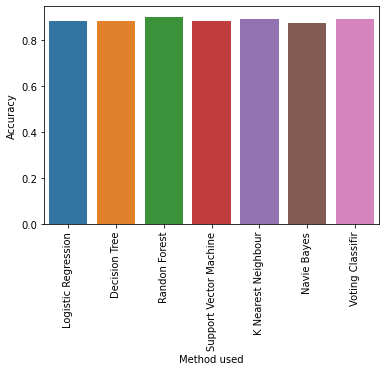

In [72]:
df_accuracy = pd.DataFrame({'Method used':list1,'Accuracy':list2})
print(df_accuracy)

chart = sns.barplot(x = 'Method used', y = 'Accuracy',data = df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

In [79]:
pred_evc_train = model_evc.predict(x_train)
pred_evc_test = model_evc.predict(x_test)

accuracy_evc_train = accuracy_score(y_train,pred_evc_train)
accuracy_evc_test = accuracy_score(y_test,pred_evc_test)

print('Training Accuracy:',accuracy_evc_train)
print('******************************')
print('Testing Accuracy:',accuracy_evc_test)

Training Accuracy: 0.9249277717587576
******************************
Testing Accuracy: 0.8920484465508162


In [81]:
classification_vot_training = classification_report(y_train,pred_evc_train)
print(classification_vot_training)
print('******************'*4)
print(classification_vot_testing)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     19547
           1       1.00      0.36      0.53      2605

    accuracy                           0.92     22152
   macro avg       0.96      0.68      0.75     22152
weighted avg       0.93      0.92      0.91     22152

************************************************************************
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8385
           1       0.63      0.19      0.29      1110

    accuracy                           0.89      9495
   macro avg       0.76      0.59      0.62      9495
weighted avg       0.87      0.89      0.87      9495



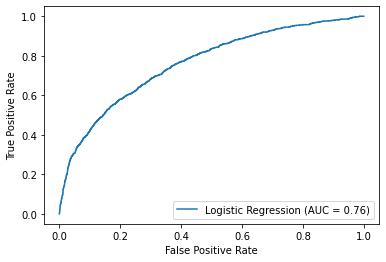

In [86]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, logit.decision_function(x_test))
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Logistic Regression')
display.plot()
plt.show()

### With GridSearch & Cross Validation

In [84]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Creating a dictionary with hyperparameters and possible values for searching

params =  {
           'penalty': ['l1', 'l2'], 
           'C': [0.2, 0.1, 1, 2, 3, 4, 5], 
           'solver': ['liblinear', 'saga'],
            }

## Configuring grid search

modelCV = GridSearchCV(estimator = LogisticRegression(max_iter=100000), param_grid = params, cv=5, scoring='roc_auc')

## fit the search with training set

modelCV.fit(x_train, y_train)

KeyboardInterrupt: 